# Model on Solar power data by Neural Network

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset 
dataset = pd.read_csv("solardatacopy.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset.head(3)

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,0.533333,118.78662,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572
1,27-04-2022 15:34,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452
2,27-04-2022 15:36,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568


In [4]:
dataset

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,0.533333,118.78662,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572
1,27-04-2022 15:34,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452
2,27-04-2022 15:36,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568
3,27-04-2022 15:38,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.06504
4,27-04-2022 15:40,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.89576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83188,22-08-2022 11:34,38.825308,75.717384,0.000000,132.66862,1260.6014,68.537032,63.832536,64.534020,66.813148,68.069592,79.634064,5.377786,428.25496
83189,22-08-2022 11:36,41.741960,73.686968,1.933333,136.43066,548.94188,60.950032,57.285688,57.378756,57.720880,59.574048,55.206604,5.386792,297.38650
83190,22-08-2022 11:38,38.165820,74.830360,0.866667,112.73886,1220.6572,70.153136,66.364708,65.804060,67.910632,69.128520,79.252616,5.376169,426.07540
83191,22-08-2022 11:40,38.194360,75.886256,0.000000,135.62674,1166.5518,70.649480,66.554636,65.879448,68.299304,69.706872,78.590624,5.376400,422.53456


In [5]:
# Making new dataset with only thousand rows
main_dataset = dataset[:1000]

In [6]:
# Looking in our new dataset
main_dataset

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,0.533333,118.78662,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.145720
1,27-04-2022 15:34,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.714520
2,27-04-2022 15:36,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.245680
3,27-04-2022 15:38,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.065040
4,27-04-2022 15:40,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.895760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,29-04-2022 00:42,17.309460,41.074188,0.000000,216.4891,0.109077,23.920030,25.268042,24.739016,24.635356,24.877156,2.812084,5.398870,15.182076
996,29-04-2022 00:44,17.381072,41.515644,0.000000,219.14172,0.009956,23.976748,25.311902,24.775616,24.663656,24.932548,2.817272,5.399050,15.210592
997,29-04-2022 00:46,17.326680,41.815348,0.000000,219.17426,0.109077,23.962048,25.301442,24.782970,24.658396,24.898070,2.820355,5.399227,15.227734
998,29-04-2022 00:48,17.178078,41.223944,0.000000,219.16896,-0.041374,23.911632,25.261766,24.761010,24.639572,24.831108,2.812084,5.398870,15.182076


In [7]:
main_dataset.shape

(1000, 14)

In [8]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Air_Temp           1000 non-null   float64
 2   Relative_Humidity  1000 non-null   float64
 3   Wind_Speed         1000 non-null   float64
 4   Wind_Direction     1000 non-null   object 
 5   Solar_Radiation    1000 non-null   object 
 6   RTD_1              1000 non-null   float64
 7   RTD_2              1000 non-null   float64
 8   RTD_3              1000 non-null   float64
 9   RTD_4              1000 non-null   float64
 10  RTD_5              1000 non-null   float64
 11  Array_Voltage      1000 non-null   float64
 12  Array_Current      1000 non-null   float64
 13  Power_Generated    1000 non-null   float64
dtypes: float64(11), object(3)
memory usage: 109.5+ KB


In [9]:
# Now deleting the un-needed rows
timestamp = main_dataset.pop("Timestamp")
winddirection = main_dataset.pop("Wind_Direction")
solarradi = main_dataset.pop("Solar_Radiation")

In [10]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1000 non-null   float64
 1   Relative_Humidity  1000 non-null   float64
 2   Wind_Speed         1000 non-null   float64
 3   RTD_1              1000 non-null   float64
 4   RTD_2              1000 non-null   float64
 5   RTD_3              1000 non-null   float64
 6   RTD_4              1000 non-null   float64
 7   RTD_5              1000 non-null   float64
 8   Array_Voltage      1000 non-null   float64
 9   Array_Current      1000 non-null   float64
 10  Power_Generated    1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [11]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

numericals = ['Air_Temp','Relative_Humidity','Wind_Speed','RTD_1','RTD_2','RTD_3','RTD_4','RTD_5','Array_Voltage','Array_Current','Power_Generated']

main_dataset[numericals] = scaler.fit_transform(main_dataset[numericals])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [12]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1000 non-null   float64
 1   Relative_Humidity  1000 non-null   float64
 2   Wind_Speed         1000 non-null   float64
 3   RTD_1              1000 non-null   float64
 4   RTD_2              1000 non-null   float64
 5   RTD_3              1000 non-null   float64
 6   RTD_4              1000 non-null   float64
 7   RTD_5              1000 non-null   float64
 8   Array_Voltage      1000 non-null   float64
 9   Array_Current      1000 non-null   float64
 10  Power_Generated    1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [13]:
main_dataset.head(10)

,Air_Temp,Relative_Humidity,Wind_Speed,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,1.564816,-1.534192,0.807433,1.495782,1.487779,1.401890,1.451999,1.462052,1.477685,-1.011010,1.477082
1,1.572223,-1.641332,3.865896,1.498363,1.484444,1.412694,1.461340,1.460950,1.480540,-0.948546,1.480504
2,1.559349,-1.675526,6.159742,1.483398,1.469471,1.396738,1.441008,1.446726,1.477981,-0.977326,1.477683
3,1.580000,-1.593546,-0.415951,1.589236,1.577059,1.498284,1.539873,1.555589,1.495418,-1.030037,1.494647
4,1.597961,-1.701878,4.783434,1.594914,1.581515,1.498851,1.538767,1.561613,1.488078,-0.996353,1.487612
5,1.594201,-1.618036,2.336664,1.588724,1.583735,1.504025,1.540419,1.567623,1.484742,-1.068411,1.483620
6,1.576600,-1.690795,1.724971,1.589749,1.587592,1.491993,1.537116,1.551754,1.491521,-1.125972,1.489876
7,1.628923,-1.620268,2.336664,1.704364,1.748469,1.706546,1.688689,1.702744,1.529339,-1.125972,1.527692
8,1.621609,-1.618413,4.936358,1.688357,1.731269,1.676221,1.677705,1.693431,1.522572,-1.130875,1.520880
9,1.607329,-1.617847,2.030819,1.680104,1.710729,1.664787,1.665612,1.674855,1.520259,-1.150062,1.518391


# Now creating X and Y for our model

In [15]:
Y = main_dataset.pop("Power_Generated")
X = main_dataset

In [52]:
X.isnull().sum()

Air_Temp             0
Relative_Humidity    0
Wind_Speed           0
RTD_1                0
RTD_2                0
RTD_3                0
RTD_4                0
RTD_5                0
Array_Voltage        0
Array_Current        0
dtype: int64

In [53]:
Y.isnull().sum()

0

In [54]:
X.shape

(1000, 10)

In [55]:
Y.shape

(1000,)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1000 non-null   float64
 1   Relative_Humidity  1000 non-null   float64
 2   Wind_Speed         1000 non-null   float64
 3   RTD_1              1000 non-null   float64
 4   RTD_2              1000 non-null   float64
 5   RTD_3              1000 non-null   float64
 6   RTD_4              1000 non-null   float64
 7   RTD_5              1000 non-null   float64
 8   Array_Voltage      1000 non-null   float64
 9   Array_Current      1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [64]:
# making a model 1

import tensorflow as tf
import random

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])



history_1 = model_1.fit(X_train,Y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5145 - mae: 0.5145
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.3243 - mae: 0.3243
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2585 - mae: 0.2585
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2160 - mae: 0.2160
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1663 - mae: 0.1663
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1462 - mae: 0.1462
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1358 - mae: 0.1358
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1155 - mae: 0.1155
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1180 - mae: 0.1180
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0999 - mae: 0.0999


In [66]:
y_pred_1 = model_1.predict(X_test)

Text(0.5, 1.0, 'Model_1 Error')

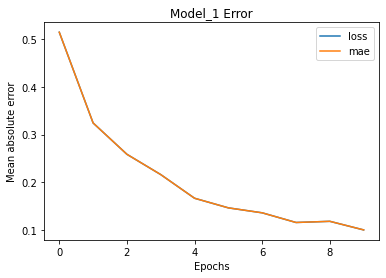

In [88]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("Mean absolute error")
plt.xlabel("Epochs")
plt.title("Model_1 Error")

In [71]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=Y_test, 
                                     y_pred=y_pred_1.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.17810541>

In [73]:
model_1.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1781 - mae: 0.1781


[0.178105428814888, 0.178105428814888]

# Model 2 

In [57]:
# making a model 2

import tensorflow as tf
import random

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])



history_2 = model_2.fit(X_train,Y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2457 - mae: 0.2457
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2204 - mae: 0.2204
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2137 - mae: 0.2137
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1922 - mae: 0.1922
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1663 - mae: 0.1663
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1643 - mae: 0.1643
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1612 - mae: 0.1612
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1406 - mae: 0.1406
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1403 - mae: 0.1403
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1176 - mae: 0.1176


Text(0.5, 1.0, 'Model_2 Error')

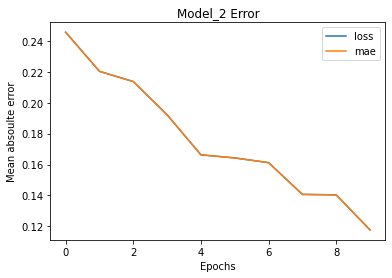

In [89]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("Mean absoulte error")
plt.xlabel("Epochs")
plt.title("Model_2 Error")

In [61]:
Y_prediction_2 = model_2.predict(X_test)

In [63]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=Y_test, 
                                     y_pred=Y_prediction_2.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.06693916>

In [74]:
model_2.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0669 - mae: 0.0669


[0.06693917512893677, 0.06693917512893677]

In [79]:
# making a model 3

import tensorflow as tf
import random

tf.random.set_seed(42)


model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])



history_3 = model_3.fit(X_train,Y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2457 - mse: 0.1072
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2204 - mse: 0.0775
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2137 - mse: 0.0680
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1922 - mse: 0.0586
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1663 - mse: 0.0502
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1643 - mse: 0.0420
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1612 - mse: 0.0377
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1406 - mse: 0.0330
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1403 - mse: 0.0330
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.0241


Text(0.5, 1.0, 'Model_3 Error')

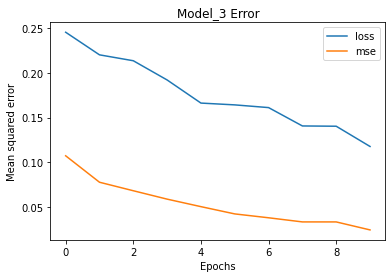

In [90]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("Mean squared error")
plt.xlabel("Epochs")
plt.title("Model_3 Error")

In [92]:
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (32, 100)                 1100      
                                                                 
 dense_48 (Dense)            (32, 10)                  1010      
                                                                 
 dense_49 (Dense)            (32, 1)                   11        
                                                                 
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________
